# moving average convergence/divergence (macd) crossover


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [91]:
# load data
# load data
df_sp500 = pd.read_csv('sp500_20210219.csv') #, index_col='Date')
df_sp500.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
df_sp500.set_index(pd.DatetimeIndex(df_sp500.loc[:, 'Date'].values), inplace=True)
df_sp500.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
1927-12-30,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


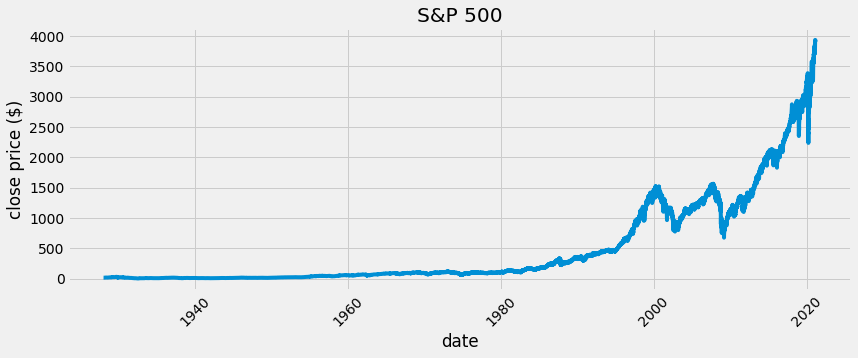

In [92]:
# visualize data
plt.figure(figsize=(12.5, 4.5))
plt.plot(df_sp500['Close'], label='close')
plt.xticks(rotation=45)
plt.title('S&P 500')
plt.xlabel('date')
plt.ylabel('close price ($)')
plt.show()

In [93]:
# calculate macd line

short_ema = df_sp500.Close.ewm(span=12, adjust=False).mean()
long_ema = df_sp500.Close.ewm(span=26, adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

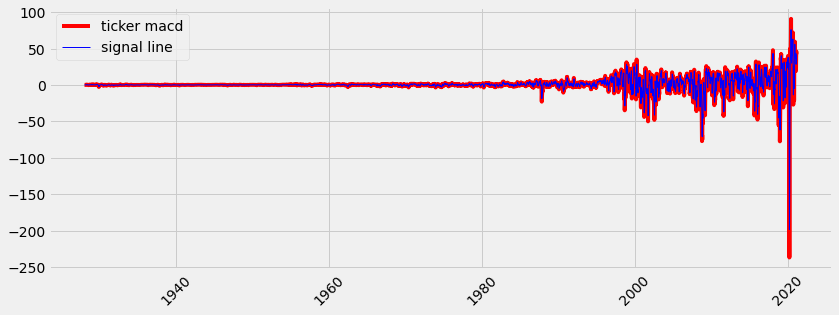

In [94]:
# visualize
plt.figure(figsize=(12.5, 4.5))
plt.plot(df_sp500.index, macd, label='ticker macd', color='red')
plt.plot(df_sp500.index, signal, label='signal line', color='blue', lw='1')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [95]:
df_sp500['macd'] = macd
df_sp500['signal_line'] = signal
df_sp500

,Date,Open,High,Low,Close,Adj_Close,Volume,macd,signal_line
1927-12-30,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.000000,0.000000
1928-01-03,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.007977,0.001595
1928-01-04,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,0.010945,0.003465
1928-01-05,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.000415,0.002689
1928-01-06,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,-0.000536,0.002044
...,...,...,...,...,...,...,...,...,...
2021-02-12,2021-02-12,3911.649902,3937.229980,3905.780029,3934.830078,3934.830078,4119260000,44.879764,37.357828
2021-02-16,2021-02-16,3939.610107,3950.429932,3923.850098,3932.590088,3932.590088,5037360000,45.973947,39.081052
2021-02-17,2021-02-17,3918.500000,3933.610107,3900.429932,3931.330078,3931.330078,4718280000,46.206781,40.506198
2021-02-18,2021-02-18,3915.860107,3921.979980,3885.030029,3913.969971,3913.969971,4773430000,44.477775,41.300513


In [96]:
df_sp500.loc[df_sp500.index[0], 'macd']

0.0

In [97]:
# function to signal when to buy/sell
def buy_sell(df):
    buy = []
    sell = []
    flag = -1

    for i in range(len(df)):
        if df.loc[df_sp500.index[i], 'macd'] > df.loc[df_sp500.index[i], 'signal_line']:
            sell.append(np.nan)
            if flag != 1:
                buy.append(df.loc[df_sp500.index[i], 'Close'])
                flag = 1
            else:
                buy.append(np.nan)
        elif df.loc[df_sp500.index[i], 'macd'] < df.loc[df_sp500.index[i], 'signal_line']:
            buy.append(np.nan)
            if flag != 0:
                sell.append(df.loc[df_sp500.index[i], 'Close'])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return (buy, sell)
        

In [98]:
# add signals
result = buy_sell(df_sp500)
df_sp500['buy_signal_price'] = result[0]
df_sp500['sell_signal_price'] = result[1]

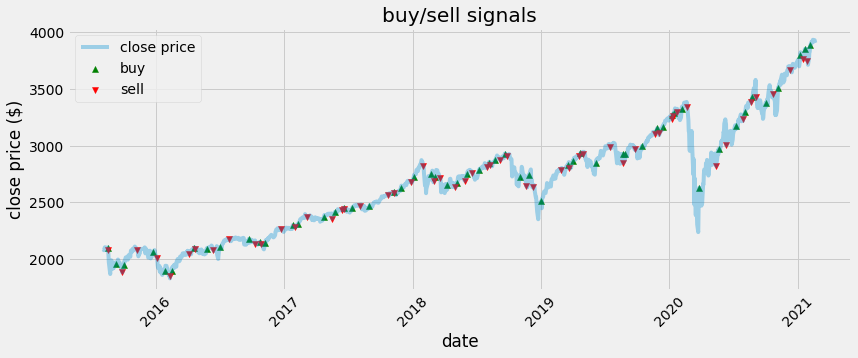

In [99]:
# visualize
beg = 22000
plt.figure(figsize=(12.5, 4.5))
plt.scatter(df_sp500.index[beg:], df_sp500.loc[df_sp500.index[beg]:, 'buy_signal_price'], color='green', label='buy', marker='^', alpha=1)
plt.scatter(df_sp500.index[beg:], df_sp500.loc[df_sp500.index[beg]:, 'sell_signal_price'], color='red', label='sell', marker='v', alpha=1)
plt.plot(df_sp500.loc[df_sp500.index[beg]:, 'Close'], label='close price', alpha=0.35)
plt.xticks(rotation=45)
plt.title('buy/sell signals')
plt.xlabel('date')
plt.ylabel('close price ($)')
plt.legend(loc='upper left')
plt.show()
